## 경사하강법

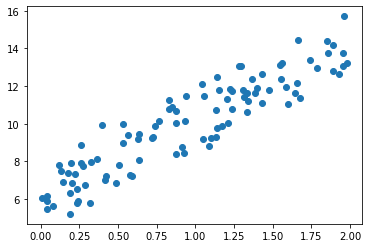

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w0=6) 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [2]:
# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

In [3]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000):
    # w0과 w1을 모두 0으로 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [5]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


실제 선형식은 y = 4X + 6 과 유사하게 w1: 4.022 w0: 6.162 도출 <br>
예측 오류 비용은 0.9935

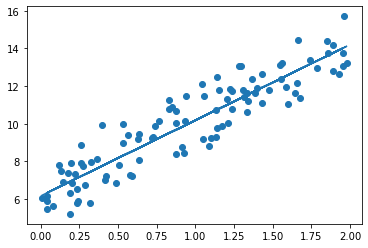

In [6]:
plt.scatter(X, y)
plt.plot(X, y_pred)

## LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from scipy import stats 
from sklearn.datasets import load_boston
%matplotlib inline 

# data load
boston = load_boston()

boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함
boston_df['PRICE'] = boston.target
print('Boston 데이터 세트 크기 :', boston_df.shape)
boston_df.head()

Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


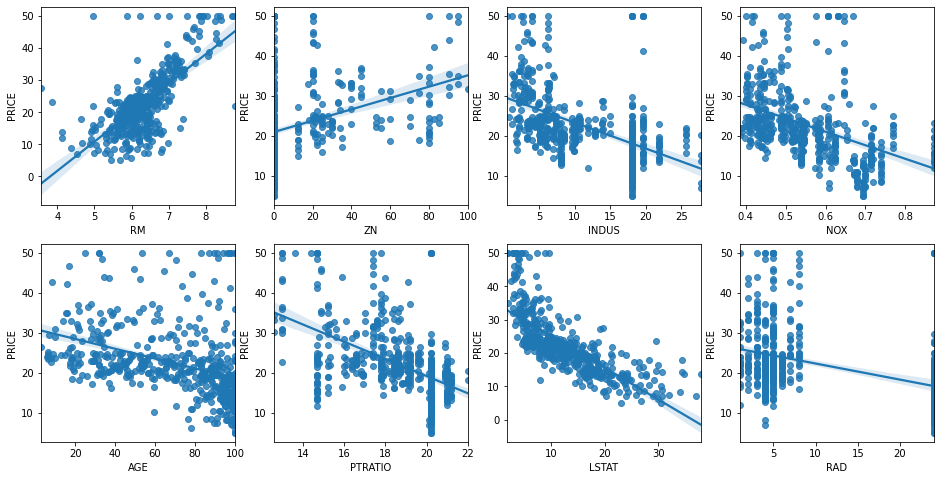

In [8]:
# 2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4x2의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

LinearRegression 클래스를 이용해 주택가격 회귀 모델 생성

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance Score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance Score : 0.757


In [10]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값 :  40.995595172164414
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [11]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성.
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정

In [12]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores : [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829


## 다항 회귀

In [13]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [14]:
def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [15]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


이처럼 사이킷런은 PolynomialFeature로 피처를 변환한 후에 LinearRegression 클래스로 다항 회귀를 구현

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np 

def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('Poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수:\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 릿지 회귀


In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 negative MSE scores: ', np.round(neg_mse_scores,3 ))
print(' 5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 3))
print(' 5 folds 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores : [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 평균 RMSE : 5.518


In [18]:
# 릿지에 사용될 alpha 파라미터 값 정의
alphas = [0, 0.1, 1, 10, 100]

# alpha에 따른 평균 rmse구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    # cross_val_score를 이용해 5 폴드의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일때 5 folds 의 평균 RMSE : 5.829
alpha 0.1 일때 5 folds 의 평균 RMSE : 5.788
alpha 1 일때 5 folds 의 평균 RMSE : 5.653
alpha 10 일때 5 folds 의 평균 RMSE : 5.518
alpha 100 일때 5 folds 의 평균 RMSE : 5.330


alpha가 100일때 가장 좋다.

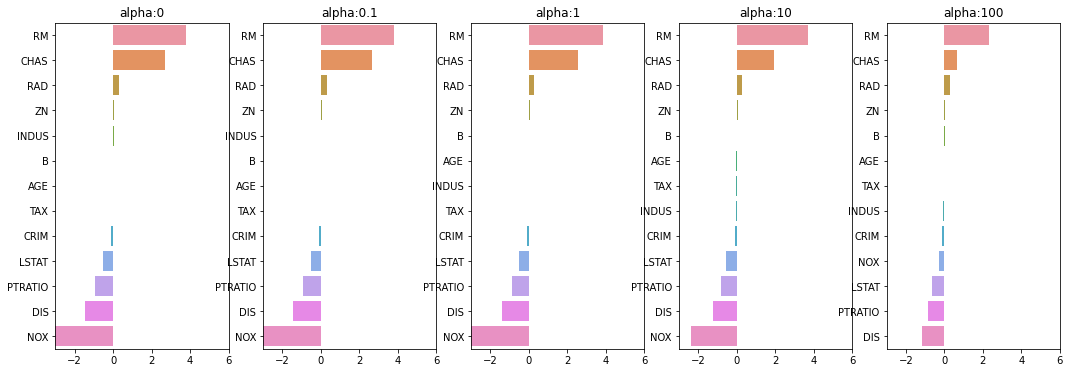

In [19]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)

    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

In [21]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


alpha 값이 증가하면서 회귀 계수가 지속적으로 작아지고 있음을 알 수 있다.

## 로지스틱 회귀

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [24]:
from sklearn.metrics import roc_auc_score, accuracy_score

# 로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도와 roc_auc 측정
print('accuracy: {0:.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


사이킷런 LogisticRegression 클래스의 주요 하이퍼 파라미터로 penalty와 C가 있다. <br>
penalty는 규제의 유형을 설정하며 'l2'로 설정 시 L2 규제를 'l1'으로 설정 시 L1 규제를 뜻한다. <br>
C는 규제 강도를 조절하는 alpha값의 역수

In [26]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

params = { 'penalty': ['l2', 'l1'],
            'C': [0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


## 회귀 실습 - 자전거 대여 수요 예측